# Context:

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Problem Statement:

Build a model to accurately predict whether the patients in the dataset have diabetes or not?

Dataset Description:

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.


Pregnancies: Number of times pregnant
Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
BloodPressure: Diastolic blood pressure (mm Hg)
SkinThickness: Triceps skin fold thickness (mm)
Insulin: 2-Hour serum insulin (mu U/ml)
BMI: Body mass index (weight in kg/(height in m)^2)
DiabetesPedigreeFunction: Diabetes pedigree function
Age: Age (years)
Outcome: Class variable (0 or 1) 268 of 768 are 1, the others are 0

Approach:

Following pointers will be helpful to structure your findings.   

1.	Perform descriptive analysis. It is very important to understand the variables and corresponding values. We need to think through - Can minimum value of below listed columns be zero (0)? On these columns, a value of zero does not make sense and thus indicates missing value.
•	Glucose
•	BloodPressure
•	SkinThickness
•	Insulin
•	BMI

      How will you treat these values?

2.	Visually explore these variable, you may need to look for the distribution of these variables using histograms. Treat the missing values accordingly.

3.	 We observe integer as well as float data-type of variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables. 


4.	Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of actions.

5.	Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

6.	Perform correlation analysis. Visually explore it using a heat map.

(Note: Do not focus on visualization aspects when working with SAS)

7.	Devise strategies for model building. It is important to decide the right validation framework. Express your thought process. Would Cross validation be useful in this scenario?

(Note: if you are working with SAS, ignore this question and perform stratified sampling to partition the data. Create strata of age for this.)

8.	Apply an appropriate classification algorithm to build a model. Compare various models with the results from KNN.

(Note: if you are working with SAS, ignore this question. Apply logistic regression technique to build the model.)

9.	Create a classification report by analysing sensitivity, specificity, AUC(ROC curve) etc. Please try to be as descriptive as possible to explain what values of these parameter you settled for? any why?

10.	Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following: 

a)	Pie chart to describe the diabetic/non-diabetic population
b)	Scatter charts between relevant variables to analyse the relationships
c)	Histogram/frequency charts to analyse the distribution of the data
d)	Heatmap of correlation analysis among the relevant variables
e)	Create bins of Age values – 20-25, 25-30, 30-35 etc. and analyse different variables for these age brackets using a bubble chart. 



In [230]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the evaluation metric
from sklearn.metrics import roc_auc_score, accuracy_score,classification_report,confusion_matrix,roc_curve,auc
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from keras.models import Model
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings('ignore')

In [144]:
healthdf = pd.read_csv('health care diabetes.csv')

In [145]:
healthdf.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [146]:
healthdf.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [147]:
healthdf.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [148]:
healthdf.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [149]:
# replace zero values with NaN in columns where zero values don't make sense
healthdf[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = healthdf[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, pd.np.NaN)


In [150]:
# Impute the missing values with the mean of the respective columns
healthdf.fillna(healthdf.mean(), inplace=True)

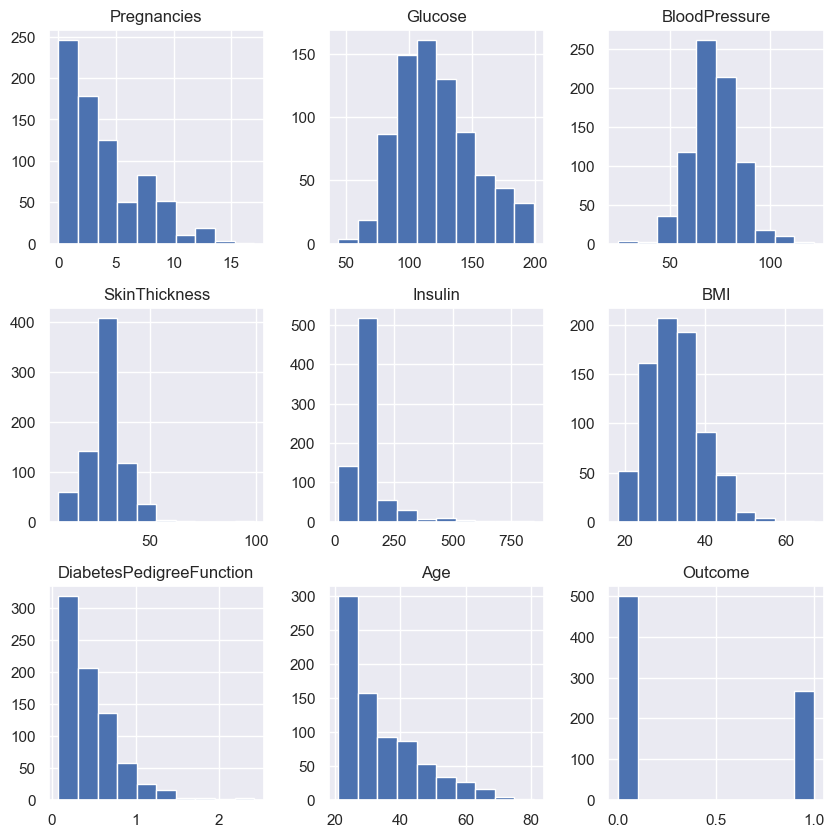

In [151]:
# Visualize the distribution of the variables using histograms
healthdf.hist(figsize=(10,10))
plt.show()

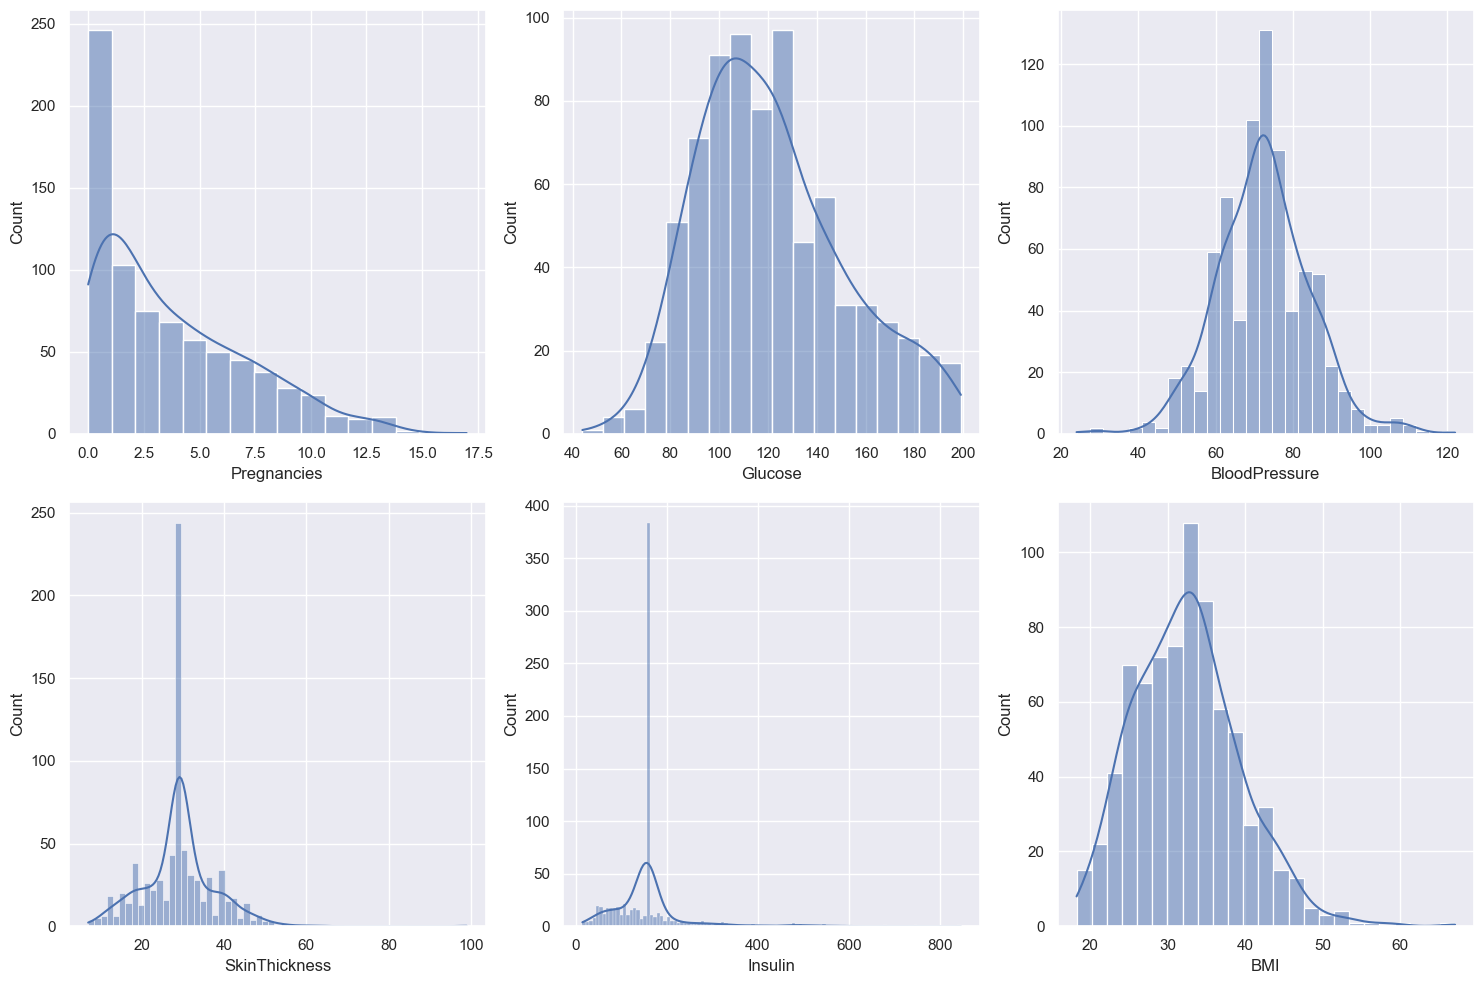

In [152]:
# Visualize the distribution of variables using histograms
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

sns.histplot(data=healthdf, x='Pregnancies', ax=axs[0, 0], kde=True)
sns.histplot(data=healthdf, x='Glucose', ax=axs[0, 1], kde=True)
sns.histplot(data=healthdf, x='BloodPressure', ax=axs[0, 2], kde=True)
sns.histplot(data=healthdf, x='SkinThickness', ax=axs[1, 0], kde=True)
sns.histplot(data=healthdf, x='Insulin', ax=axs[1, 1], kde=True)
sns.histplot(data=healthdf, x='BMI', ax=axs[1, 2], kde=True)

plt.tight_layout()
plt.show()





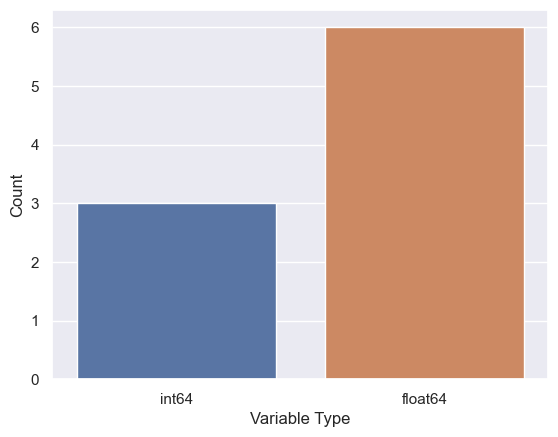

In [153]:
# Create a count plot describing the data types and the count of variables
sns.set(style="darkgrid")
ax = sns.countplot(x="dtypes", data=healthdf.dtypes.reset_index().rename(columns={0:'dtypes', 'index':'variables'}))
ax.set(xlabel='Variable Type', ylabel='Count')
plt.show()

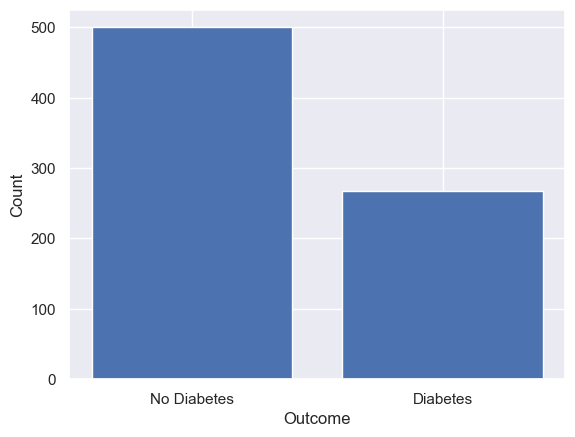

In [154]:
# Plot the count of outcomes by their value
outcome_counts = healthdf['Outcome'].value_counts()
plt.bar(outcome_counts.index, outcome_counts.values)
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.xticks([0,1], ['No Diabetes', 'Diabetes'])
plt.show()

In [155]:
# Print the percentage of outcomes
percentages = (outcome_counts / len(healthdf)) * 100
print('Percentage of Outcomes:')
print(percentages)

Percentage of Outcomes:
0    65.104167
1    34.895833
Name: Outcome, dtype: float64


Based on the output, we can see that the dataset is slightly imbalanced, with 65.1% of outcomes being 0 and 34.9% being 1. We can proceed with this imbalance as it is not too severe.

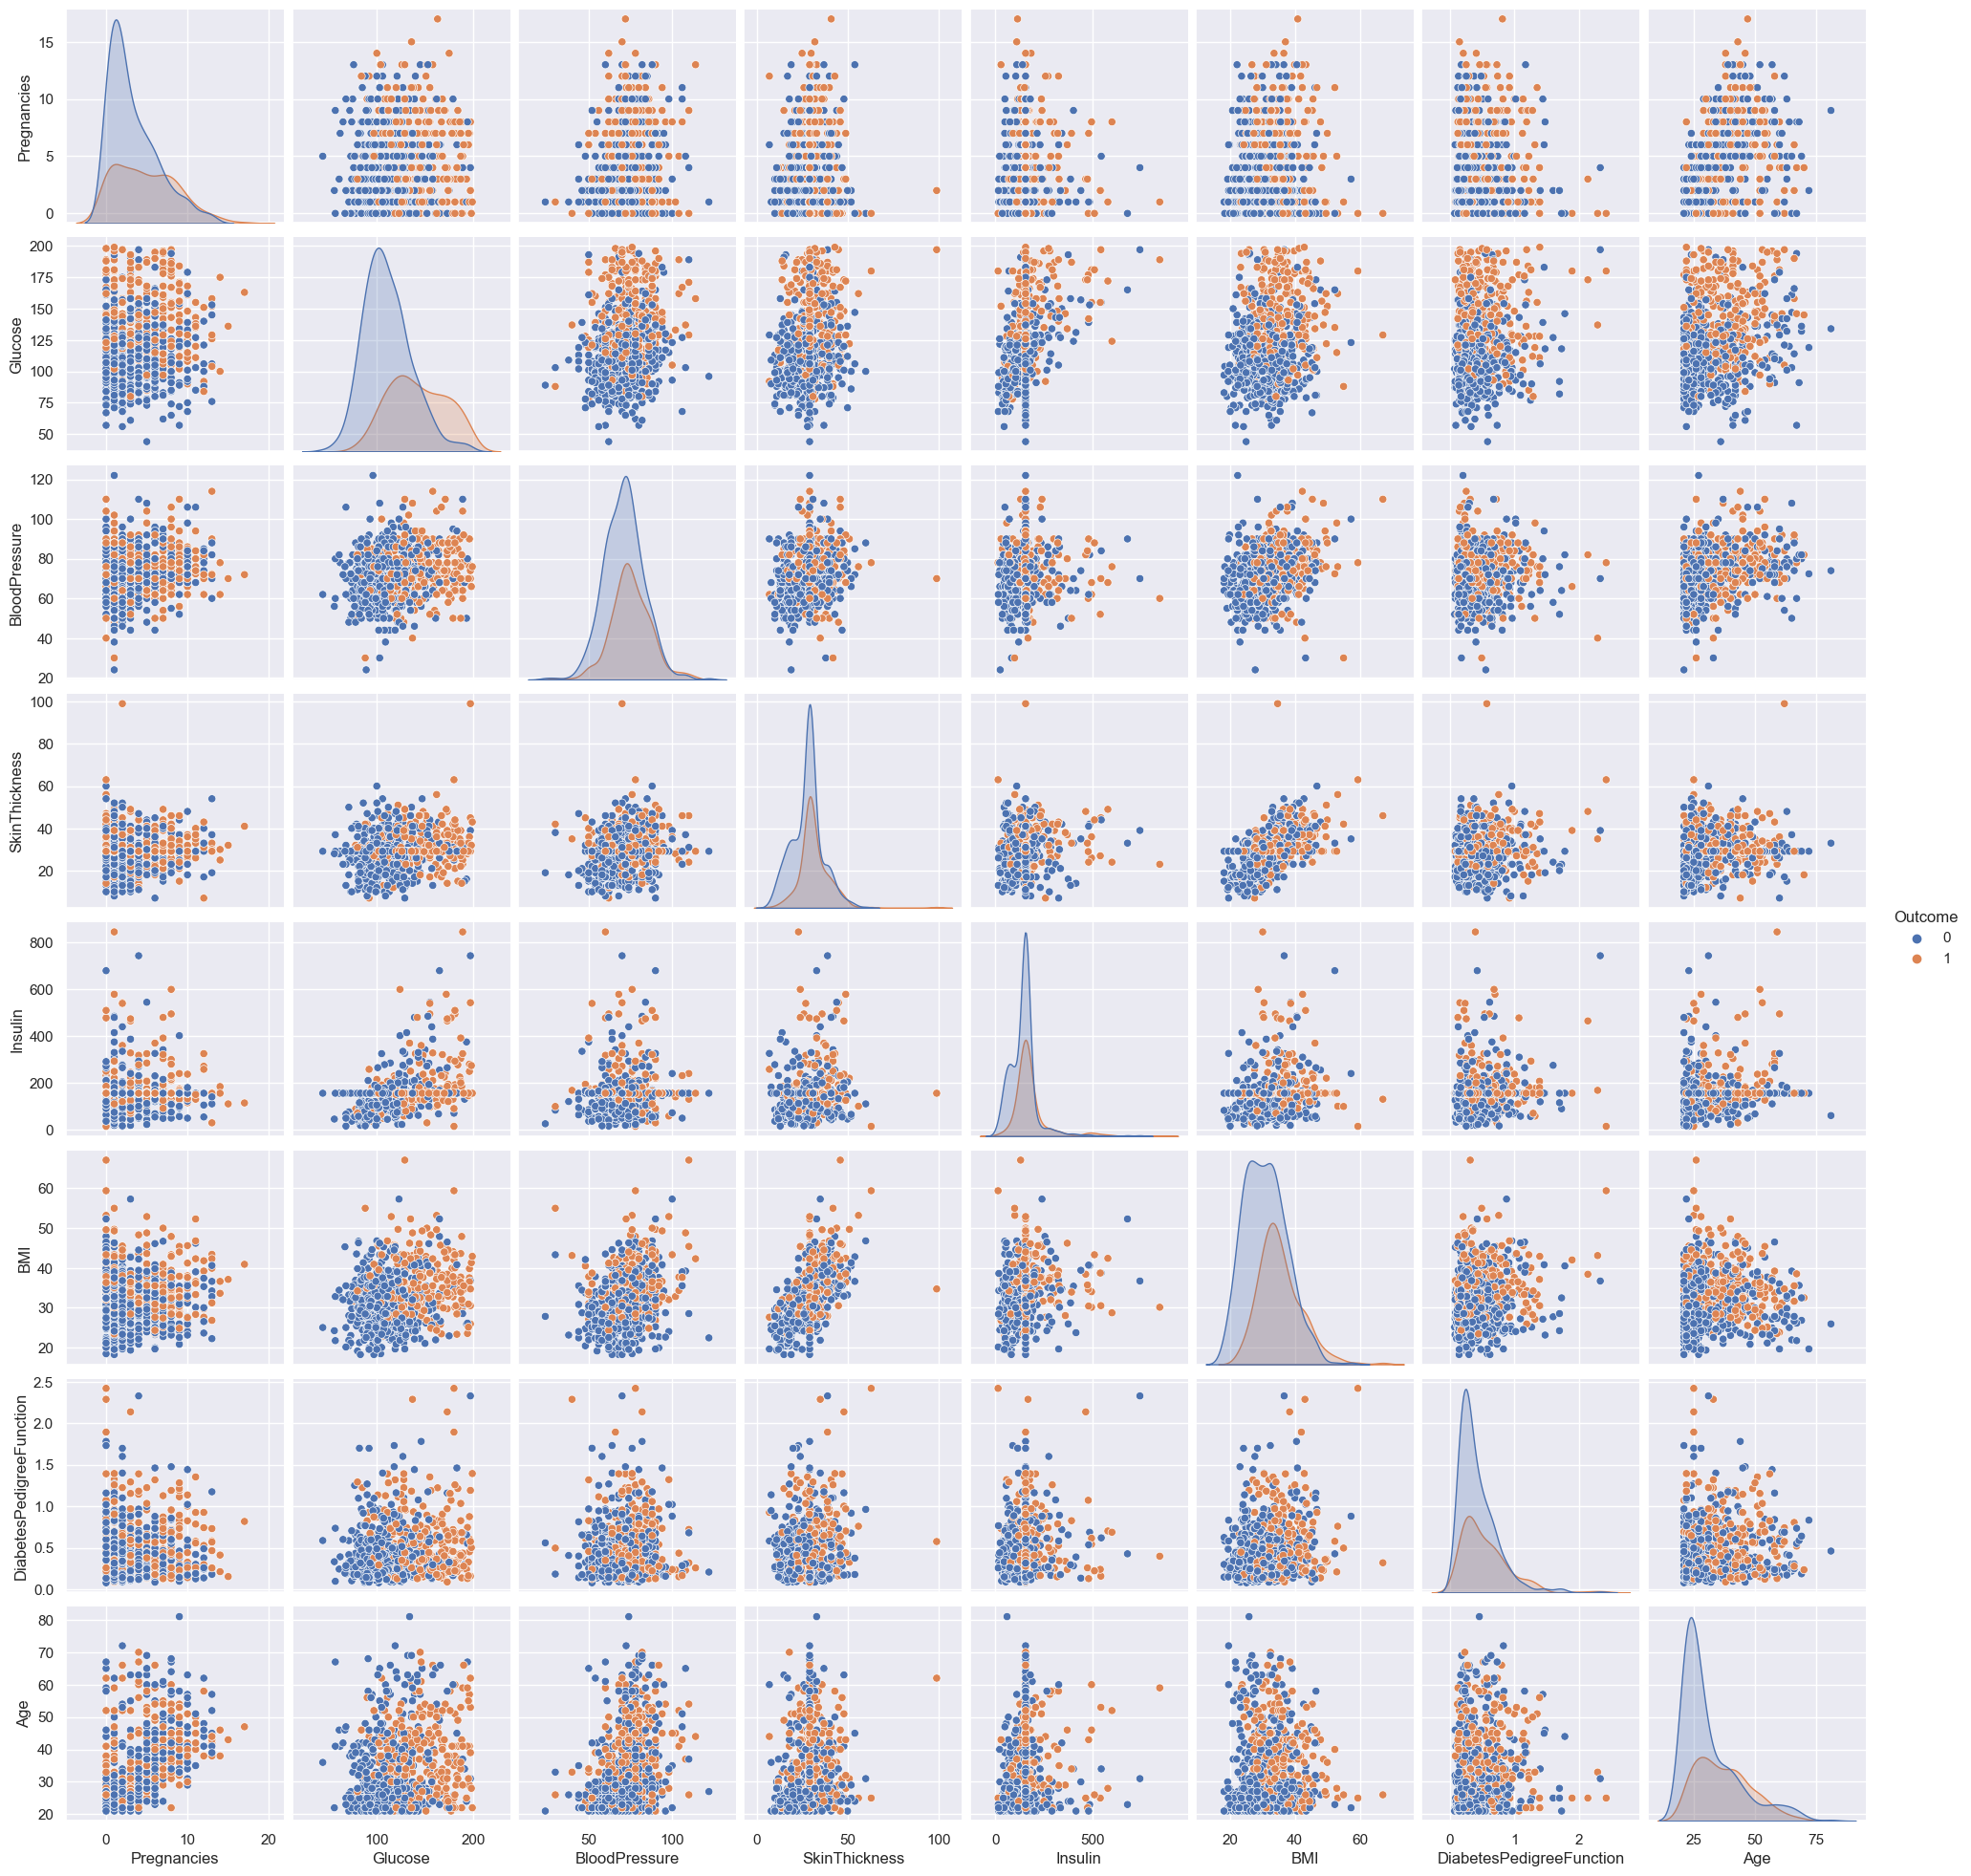

In [156]:
# Create scatter plots between pairs of variables
sns.pairplot(healthdf, hue='Outcome')
plt.show()


There is a positive correlation between glucose and outcome.
There is a weak positive correlation between age and pregnancies.
There is no strong correlation between any of the other variables.

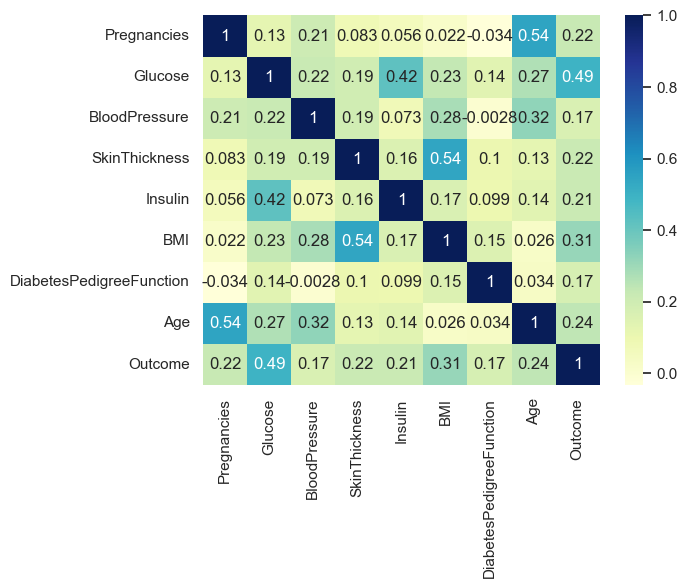

In [157]:
# Compute the correlation matrix
corr = healthdf.corr()

# Visualize the correlation matrix using a heat map
sns.heatmap(corr, annot=True, cmap='YlGnBu')
plt.show()

In [158]:
# Split the dataset into training and testing sets
X = healthdf.drop('Outcome', axis=1)
y = healthdf['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


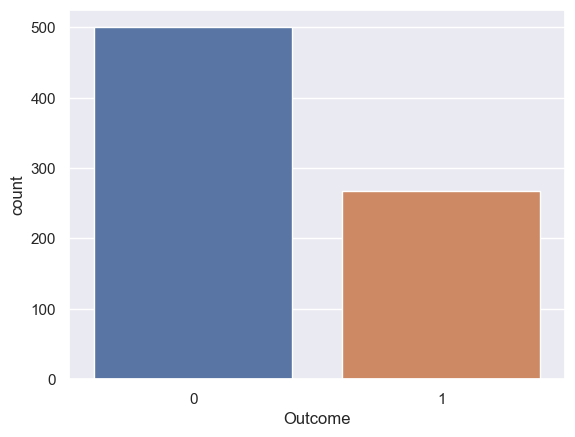

In [159]:
# Check the balance of the data by plotting the count of outcomes by their value
sns.countplot(x='Outcome', data=healthdf)
plt.show()

In [160]:

# Determine the baseline AUC score for a random classifier
y_pred = [0 for _ in range(len(y_test))]
print('Baseline AUC score:', roc_auc_score(y_test, y_pred))

Baseline AUC score: 0.5


In [161]:
# Create a Random Forest classifier with default parameters
rfc = RandomForestClassifier()


In [162]:
# Train the classifier on the training data
rfc.fit(X_train, y_train)



RandomForestClassifier()

In [163]:
# Predict the outcome on the testing data
y_pred = rfc.predict(X_test)



In [164]:
# Generate classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       100
           1       0.68      0.59      0.63        54

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.75      0.76      0.76       154



In [165]:
#proba = rfc.predict_proba(X_test)[:, 1]

In [166]:
# Compute and print AUC score
auc_score = roc_auc_score(y_test, y_pred)
print('AUC Score:', auc_score)

AUC Score: 0.7212962962962962


In [167]:
# Define cross-validation technique
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

In [168]:
# Define PCA estimator
pca = PCA()

In [224]:
# Define logistic regression estimator
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [170]:
# Define pipeline with PCA and logistic regression
pipe = Pipeline([('pca', pca), ('lr', lr)])

In [171]:
# Evaluate pipeline using cross-validation
scores = cross_val_score(pipe, X, y, cv=cv, scoring='roc_auc')

In [172]:
# Use Lasso regression for feature selection
lasso = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
selector = SelectFromModel(lasso)

In [173]:
# Define pipeline with feature selection, PCA, and logistic regression
pipe2 = Pipeline([('select', selector), ('pca', pca), ('lr', lr)])

In [174]:
# Evaluate pipeline using cross-validation
scores2 = cross_val_score(pipe2, X, y, cv=cv, scoring='roc_auc')

In [175]:
print('Mean AUC with feature selection:', np.mean(scores2))

Mean AUC with feature selection: 0.8414814814814815


In [176]:
# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [177]:
# Perform PCA
pca = PCA(n_components=5)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [196]:
# Define the models
models = []
models.append(('LR', LogisticRegression()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC(kernel='linear', probability=True)))

In [179]:
# Evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean()} ({cv_results.std()})")

LR: 0.7606821787414066 (0.04491715774005752)
RF: 0.7524325753569541 (0.04035547548142811)
SVM: 0.7459809624537281 (0.04089105224382785)


In [180]:
# Select features using Lasso regression
lasso = SelectFromModel(LogisticRegression(penalty="l1", solver="liblinear"))
X_train = lasso.fit_transform(X_train, y_train)
X_test = lasso.transform(X_test)


LR
[[78 22]
 [25 29]]
              precision    recall  f1-score   support

           0       0.76      0.78      0.77       100
           1       0.57      0.54      0.55        54

    accuracy                           0.69       154
   macro avg       0.66      0.66      0.66       154
weighted avg       0.69      0.69      0.69       154


RF
[[74 26]
 [19 35]]
              precision    recall  f1-score   support

           0       0.80      0.74      0.77       100
           1       0.57      0.65      0.61        54

    accuracy                           0.71       154
   macro avg       0.68      0.69      0.69       154
weighted avg       0.72      0.71      0.71       154


SVM
[[79 21]
 [25 29]]
              precision    recall  f1-score   support

           0       0.76      0.79      0.77       100
           1       0.58      0.54      0.56        54

    accuracy                           0.70       154
   macro avg       0.67      0.66      0.67       154
weig

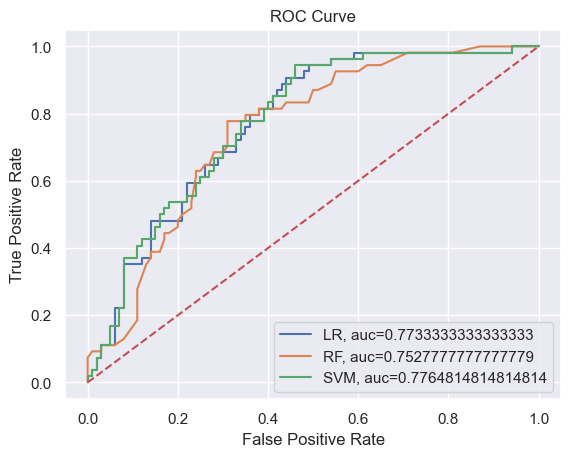

In [199]:
# Evaluate the models on the testing dataset
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, proba)
    auc = roc_auc_score(y_test, proba)
    plt.plot(fpr, tpr, label=f"{name}, auc={auc}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [212]:
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
nb = GaussianNB()

In [213]:
# Train and evaluate models using cross-validation
models = [knn, dt, nb, lr]
model_names = ['KNN', 'Decision Tree', 'Naive Bayes', 'Logistic Regression']

In [214]:
scores = []
for model in models:
    cv_score = cross_val_score(model, X_train, y_train, cv=5)
    scores.append(cv_score)

In [215]:
# Compare performance of different models
for i, score in enumerate(scores):
    print(f'{model_names[i]} CV Score Mean: {score.mean():.3f}, Standard Deviation: {score.std():.3f}')
    

KNN CV Score Mean: 0.710, Standard Deviation: 0.044
Decision Tree CV Score Mean: 0.679, Standard Deviation: 0.036
Naive Bayes CV Score Mean: 0.723, Standard Deviation: 0.013
Logistic Regression CV Score Mean: 0.752, Standard Deviation: 0.006


In [216]:
# Train and evaluate KNN model on test data
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [217]:
y_pred = knn.predict(X_test)

In [218]:
acc = accuracy_score(y_test, y_pred)


In [219]:
report = classification_report(y_test, y_pred)


In [220]:
print(f'KNN Test Accuracy: {acc:.3f}')


KNN Test Accuracy: 0.734


In [221]:
print(report)

              precision    recall  f1-score   support

           0       0.79      0.80      0.80       100
           1       0.62      0.61      0.62        54

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154



In [227]:
lr.fit(X_train,y_train)

LogisticRegression()

In [232]:
# generate ROC curve and calculate AUC
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)


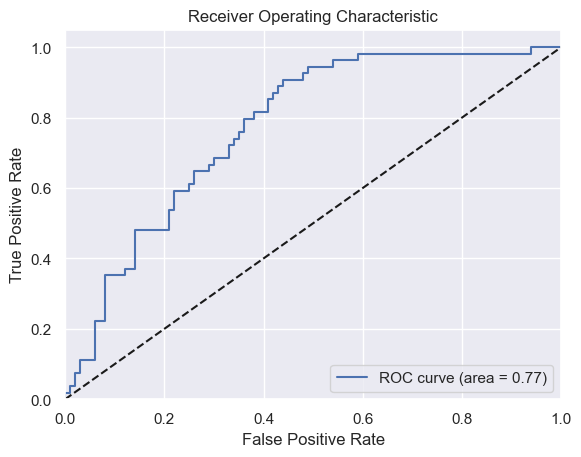

In [233]:
# plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()